### ChatGPT o1 prompt
The following requirements outline the desired functionality for a Python script that produces a composite performance figure based on simulation summary statistics. The script should process a DataFrame containing simulation summary statistics for different hospital scenarios and then generate a bar chart displaying a composite performance score for each scenario. The composite performance score is calculated by normalizing several key performance metrics and combining them, where a lower score indicates better overall performance. The optimal scenario is defined as the one with the lowest composite score.

#### Summary Statistics (provided):
| Scenario                        | AverageWaitingTime_mean | AverageWaitingTime_std | FinalQueueLength_mean | FinalQueueLength_std | TotalDischarges_mean | TotalDischarges_std | SingleRoomSwaps_mean | SingleRoomSwaps_std |
|---------------------------------|-------------------------|------------------------|-----------------------|----------------------|----------------------|---------------------|----------------------|---------------------|
| Base                            | 15.692845               | 1.585805               | 4.033333              | 2.511811             | 45.333333            | 2.482120            | 0.000000             | 0.000000            |
| High Arrival + More Bays        | 17.740070               | 1.436257               | 14.200000             | 4.838067             | 62.366667            | 1.902509            | 10.833333            | 3.751628            |
| High Arrival + More Bays (2)    | 17.369735               | 1.497732               | 13.333333             | 4.700208             | 71.400000            | 1.868062            | 12.100000            | 3.871648            |
| High Arrival + More Beds        | 16.229416               | 1.689082               | 11.266667             | 4.982267             | 82.200000            | 2.881570            | 11.000000            | 5.842767            |
| High Arrival + More Singles     | 17.602071               | 1.287501               | 13.966667             | 4.715955             | 65.533333            | 1.960530            | 17.533333            | 4.854670            |
| High Arrival                    | 18.278066               | 1.302240               | 14.300000             | 4.728126             | 53.466667            | 1.814374            | 9.500000             | 3.159550            |
| Low Arrival                     | 10.332348               | 6.274914               | 0.433333              | 0.817200             | 37.166667            | 5.356809            | 1.433333             | 1.924136            |
| More Beds                       | 12.277906               | 2.238171               | 1.466667              | 1.696514             | 53.833333            | 4.465062            | 3.633333             | 3.221515            |
| More Singles                    | 13.392674               | 2.091807               | 2.600000              | 2.607681             | 50.466667            | 3.256117            | 7.433333             | 4.415360            |

#### Requirements:

1. **Input Data:**  
   The DataFrame includes the following columns:
   - `Scenario`: A string representing the scenario name.
   - `AverageWaitingTime_mean`: Mean waiting time.
   - `FinalQueueLength_mean`: Mean final queue length.
   - `TotalDischarges_mean`: Mean total discharges.
   - `SingleRoomSwaps_mean`: Mean single room swaps.

2. **Data Filtering:**  
   Remove the "Low Arrival" scenario from the DataFrame.

3. **Index Reset:**  
   After filtering, reset the DataFrame index so that the indices are sequential (0, 1, 2, …).

4. **Normalization:**  
   Normalize each metric by its maximum value:
   - `norm_wait = AverageWaitingTime_mean / max(AverageWaitingTime_mean)`
   - `norm_queue = FinalQueueLength_mean / max(FinalQueueLength_mean)`
   - `norm_swaps = SingleRoomSwaps_mean / max(SingleRoomSwaps_mean)`  
     (Ensure that division by zero is avoided.)
   - `norm_discharges = TotalDischarges_mean / max(TotalDischarges_mean)`

5. **Composite Score Calculation:**  
   Compute a composite performance score for each scenario using the formula:
   
   \[
   \text{CompositeScore} = \text{norm\_wait} + \text{norm\_queue} + \text{norm\_swaps} - \text{norm\_discharges}
   \]
   
   Lower composite scores indicate superior performance.

6. **Optimal Scenario Identification:**  
   Identify the optimal scenario as the one with the lowest composite score.

7. **Visualization:**  
   Create a bar chart with the following characteristics:
   - Use a white background with a minimalist grid (via Seaborn’s "whitegrid" style).
   - Ensure that the y-axis starts at 0.
   - Title the chart as **"Figure 5: Composite Performance Score by Scenario"** with the title in bold.
   - Rotate x-axis labels 45° for better readability.
   - Use "steelblue" for the default bar color, and highlight the bar corresponding to the optimal scenario in "darkorange".

8. **Output:**  
   The script should display the bar chart and print the name of the optimal scenario.

9. **Code Format:**  
   Provide the complete, standalone Python script, including all necessary imports and appropriate comments.

Please generate the Python code that meets the above requirements.

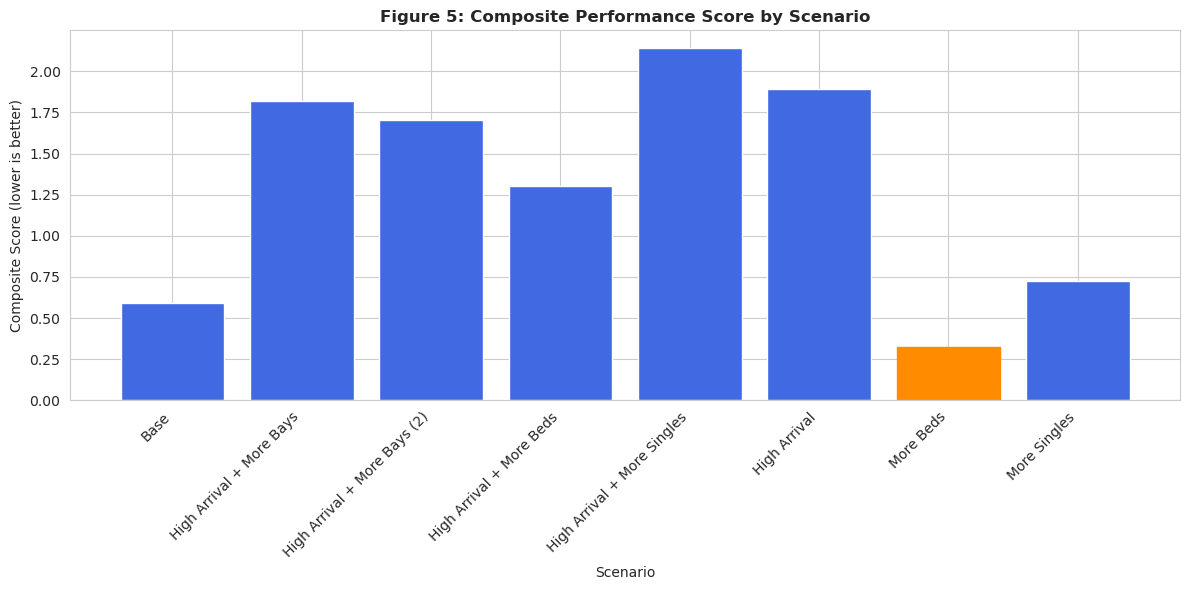

Optimal scenario identified: More Beds


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a DataFrame from your summary statistics.
data = {
    "Scenario": [
        "Base", 
        "High Arrival + More Bays", 
        "High Arrival + More Bays (2)",
        "High Arrival + More Beds", 
        "High Arrival + More Singles", 
        "High Arrival", 
        "Low Arrival", 
        "More Beds", 
        "More Singles"
    ],
    "AverageWaitingTime_mean": [
        15.692845, 17.740070, 17.369735, 16.229416, 17.602071,
        18.278066, 10.332348, 12.277906, 13.392674
    ],
    "FinalQueueLength_mean": [
        4.033333, 14.200000, 13.333333, 11.266667, 13.966667,
        14.300000, 0.433333, 1.466667, 2.600000
    ],
    "TotalDischarges_mean": [
        45.333333, 62.366667, 71.400000, 82.200000, 65.533333,
        53.466667, 37.166667, 53.833333, 50.466667
    ],
    "SingleRoomSwaps_mean": [
        0.000000, 10.833333, 12.100000, 11.000000, 17.533333,
        9.500000, 1.433333, 3.633333, 7.433333
    ]
}

df = pd.DataFrame(data)

# Remove the "Low Arrival" scenario for realistic operation.
df = df[df["Scenario"] != "Low Arrival"]

# Reset index so that the DataFrame indices are continuous (0,1,2,...)
df = df.reset_index(drop=True)

# Normalize each metric by its maximum value.
norm_wait = df["AverageWaitingTime_mean"] / df["AverageWaitingTime_mean"].max()
norm_queue = df["FinalQueueLength_mean"] / df["FinalQueueLength_mean"].max()
norm_swaps = df["SingleRoomSwaps_mean"] / (df["SingleRoomSwaps_mean"].max() if df["SingleRoomSwaps_mean"].max() != 0 else 1)
norm_discharges = df["TotalDischarges_mean"] / df["TotalDischarges_mean"].max()

# Composite Score = normalized(waiting time) + normalized(queue length) + normalized(swaps) - normalized(discharges)
df["CompositeScore"] = norm_wait + norm_queue + norm_swaps - norm_discharges

# Identify the optimal scenario (lowest composite score).
optimal_idx = df["CompositeScore"].idxmin()
optimal_scenario = df.loc[optimal_idx, "Scenario"]

# Set a white background with a minimalist grid.
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), facecolor='white')
bars = plt.bar(df["Scenario"], df["CompositeScore"], capsize=5, color='royalblue')

# Highlight the optimal scenario in dark orange.
for i, bar in enumerate(bars):
    if df.loc[i, "Scenario"] == optimal_scenario:
        bar.set_color('darkorange')

plt.xlabel("Scenario")
plt.ylabel("Composite Score (lower is better)")
plt.title("Figure 5: Composite Performance Score by Scenario", fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

print("Optimal scenario identified:", optimal_scenario)